In [3]:
from flatsurf import *
from surface_dynamics import *

In [59]:
h31_c4 = """(0)-(2) (1,3,2)-(4,5) (4)-(3) (5)-(0,1)
(0)-(2) (1,2,3)-(4,5) (4)-(3) (5)-(0,1)
(0,4,1)-(0,5) (2)-(4) (3)-(1) (5)-(2,3)
(0,1)-(5) (2,5)-(3,4) (3)-(0) (4)-(1,2)
(0,1)-(0,3) (2,3)-(4,5) (4)-(2) (5)-(1)
(0,4)-(5) (1,5)-(2,4,3) (2)-(1) (3)-(0)
(0,4)-(5) (1,5)-(2,3,4) (2)-(1) (3)-(0)
(0,1)-(0,4,5) (2,3)-(1) (4)-(2) (5)-(3)
(0,3)-(5) (1)-(2) (2,5)-(3,4) (4)-(0,1)
(0,1)-(0,2) (2)-(3) (3,4)-(1,5) (5)-(4)"""
h211_c4 = """(0,1,2)-(3,6,4,5) (3,4)-(2) (5)-(0) (6)-(1)
(0,1)-(0,3) (2,5)-(1,6) (3,6)-(4,5) (4)-(2)
(0,2)-(0,5) (1,3)-(1,6) (4,5)-(3) (6)-(2,4)
(0,2)-(6) (1,4)-(3,5) (3,6)-(2,4) (5)-(0,1)
(0,1)-(4) (2,4,3)-(5,6) (5)-(0,2) (6)-(1,3)
(0,3,1)-(0,6) (2,6)-(4,5) (4)-(3) (5)-(1,2)
(0,1)-(0,4) (2,3,4)-(5,6) (5)-(2) (6)-(1,3)
(0,3,1)-(0,6) (2,6)-(4,5) (4)-(1) (5)-(2,3)
(0,1)-(0,4) (2,4,3)-(5,6) (5)-(2) (6)-(1,3)
(0,2,1)-(5,6) (3,6)-(0,4,1) (4)-(2) (5)-(3)
(0,1,2)-(0,1,6) (3)-(5) (4,5)-(2) (6)-(3,4)
(0,5,2)-(3) (1,3)-(1,6) (4)-(5) (6)-(0,4,2)
(0,4,1)-(5,6) (2,5)-(4) (3)-(2) (6)-(0,3,1)
(0,1,4)-(0,1,6) (2,3)-(2,5) (5)-(4) (6)-(3)
(0,3,1)-(6) (2)-(3) (4,6)-(0,5,1) (5)-(2,4)
(0,2,1)-(5,6) (3,6)-(0,4,1) (4)-(3) (5)-(2)
(0)-(1) (1,3,4,2)-(5,6) (5)-(0,4) (6)-(2,3)
(0)-(1,2) (1,4,2,3)-(5,6) (5)-(4) (6)-(0,3)
(0,5,4,1)-(0,6) (2)-(4) (3)-(1,5) (6)-(2,3)
(0,4,3,1)-(5,6) (2)-(3) (5)-(4) (6)-(0,2,1)
(0,4,3,1)-(5,6) (2)-(4) (5)-(3) (6)-(0,2,1)
(0,1,5,2)-(0,1,6) (3)-(5) (4)-(2) (6)-(3,4)
(0,5,4)-(6) (1,6)-(2,4,3,5) (2)-(1) (3)-(0)
(0,1,2)-(0,5,1,6) (3,4)-(2) (5)-(3) (6)-(4)
(0,5,4)-(6) (1,6)-(2,5,3,4) (2)-(1) (3)-(0)
(0,4)-(6) (1,2)-(5) (3)-(0) (5,6)-(1,4,2,3)
(0,6)-(2,5,3,4) (1,4)-(6) (2,3)-(1) (5)-(0)
(0,1)-(0,3,5,6) (2,4)-(1) (3,6)-(4) (5)-(2)
(0,4,1)-(6) (2)-(3) (3,6)-(4,5) (5)-(0,2,1)
(0,1,2)-(1,6) (3,4)-(0,5,2) (5)-(4) (6)-(3)
(0,1,2)-(0,1,6) (3,4)-(2,5) (5)-(4) (6)-(3)
(0,3,1)-(6) (2)-(4) (4,6)-(0,5,1) (5)-(2,3)
(0)-(3) (1,3,2,4)-(5,6) (5)-(4) (6)-(0,2,1)
(0)-(3) (1,4,2,3)-(5,6) (5)-(4) (6)-(0,2,1)
(0,3,1,2)-(0,6,1) (4)-(2) (5)-(3) (6)-(4,5)
(0,4,1)-(5,6) (2,3)-(4) (5)-(2) (6)-(0,3,1)
(0,1,2)-(0,1,6) (3,6)-(4,5) (4)-(3) (5)-(2)
(0,4,2)-(5,6) (1,3)-(0,1,2) (5)-(4) (6)-(3)
(0,2,1)-(6) (3,6)-(4,5) (4)-(2) (5)-(0,3,1)
(0,2)-(5) (1,3)-(6) (4)-(0,1) (5,6)-(2,4,3)
(0,1)-(0,2,5) (2,4)-(6) (3,6)-(1,4) (5)-(3)
(0,1)-(0,2) (2,5)-(6) (3,6)-(1,5,4) (4)-(3)
(0,1)-(0,2,5) (2)-(3) (3,6)-(1,4) (4,5)-(6)
(0,1)-(0,2) (2,4)-(6) (3,6)-(1,5,4) (5)-(3)
(0,2,1)-(6) (3,6)-(0,5,4,1) (4)-(3) (5)-(2)
(0,2,1)-(6) (3,6)-(0,5,4,1) (4)-(2) (5)-(3)
(0,1,2)-(0,1,5,6) (3,4)-(2) (5)-(4) (6)-(3)
(0,2,1)-(5,6) (3,4)-(0,2,1) (5)-(4) (6)-(3)
(0,2,1)-(6) (3,6)-(4,5) (4)-(3) (5)-(0,2,1)
(0,3,1,2)-(4,5,6) (4)-(2) (5)-(3) (6)-(0,1)"""

In [53]:
def string_to_int_tuple(string):
    for char in "()":
        string = string.replace(char,'')
    str_split = string.split(',')
    return tuple(int(a) for a in str_split)

def parse_cylinder_diagrams(diagram_string):
    diagrams_list = diagram_string.split('\n')
    output = []
    for diagram in diagrams_list:
        cyl_diag = []
        diagram_pieces = diagram.split()
        for piece in diagram_pieces:
            a, b = piece.split('-')
            cyl_diag.append((string_to_int_tuple(a), string_to_int_tuple(b)))
        output.append(CylinderDiagram(cyl_diag))
    return output

In [60]:
diagrams = parse_cylinder_diagrams(h211_c4)

In [61]:
o = diagrams[0].origamis()

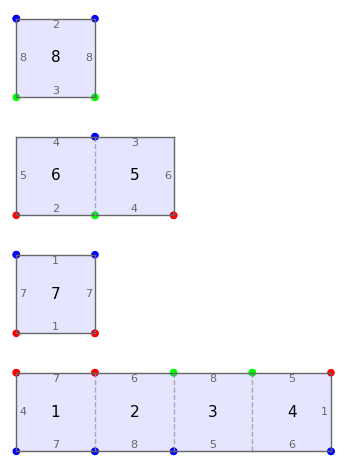

In [62]:
o[0].plot()